<a href="https://colab.research.google.com/github/DeisyData/BIT_IA_Bootcamp/blob/main/S11_C1_Emojis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
# Notebook to release Sentiment Analysis - prediction
# Iván Andrés Trujillo abella
# ivantrujillo1229@gmail.com

In [222]:
url = "https://raw.githubusercontent.com/it-ces/Datasets/refs/heads/main/tweets(ai-page).csv"

In [223]:
pip install emoji --upgrade

In [224]:
import emoji
import pandas as pd
import numpy as np

In [225]:
s = '😡'
code = 'U000{:X}'.format(ord(s))
print(code)

U0001F621


UNICODE

U+8 CARACTERES HEXADECIMAL


In [226]:
matches = ["U0001F602", "U0001F643" , "U0001F60d"]
emojis = [emoji.replace('U', r"\U").encode().decode('unicode-escape') for emoji in matches]
print(emojis)

['😂', '🙃', '😍']


In [227]:
print(emoji.is_emoji("\U0001F602"))
emoji.is_emoji("😍")

True


True

In [228]:
emoji.distinct_emoji_list("\U0001F607 hello world")

['😇']

# cARGAR LOS TEETS

In [229]:
df = pd.read_csv(url)

In [230]:
print(df.head(30))

                                                tweet
0                                miBanco D q se trata
1   ¿Cómo proteger los negocios de la inflación? E...
2                                           miBanco 😁
3   miBanco En varias ocasiones informe que autori...
4                  miBanco miBancoApp Ya está caído 😕
5   miBanco Ya, vamos a ver en cuántos días obteng...
6   miBanco, miBancoApp, y ahorro a la mano, la es...
7   Para q sirve pedir turno anticipadamente en mi...
8     miBanco Para ver de qué forma me pueden ayudar.
9   Aventuras con miBanco, les digo que voy a perd...
10   miBanco Día de pago de nómina y miBanco valie...
11  ⚠️ Av. Regional a la altura de miBanco, #Movil...
12  💳Ingresa al Sistema pagando con tus tarjetas d...
13  Señores miBanco   y si existe pendiente de la ...
14  miBanco  Dejen de responder mierda que no func...
15   miBanco  Perp lo que realmente queremos es po...
16   ¡Hola! En este momento las transferencias de ...
17  Weak results at the hold

In [231]:
df['emoticons']='None'

for index in df.index:
    if len(emoji.distinct_emoji_list(df.loc[index,'tweet']))>0:
        im = emoji.distinct_emoji_list(df.loc[index,'tweet'])
        df.loc[index, 'emoticons'] = im[0] # take the first emoticon

df  = df[df['emoticons']!='None'].reset_index(drop=True)

def label_emoji(emojis):
    labels={'Angry':['🤬','😡', '😤','🤭'],
            'Smile':['😁','🤗', '😀'],
            'Nice':['😎','♥️','👍', '😍','👍🏾','😻','🙏🏽','🙌🏼',
                     '👏🏻','🦾', '🤘', '💪'],
            'No nice': ['🖕🏼','🤡','🤦','👎🏾','🥲' ,'😰'],
            'Sad':['😔', '😩','😢','😫', '😭' ]}
    class_name = 'Another'
    for emoticon in emojis:
        if emojis =='None':
            return 'None'
        for label in labels:
            if emoticon in labels[label]:
                class_name = label
    return class_name

In [232]:
df['y'] = df['emoticons'].apply(lambda x: label_emoji(x))

In [233]:
# Mejora uno incluir en los labels los emoticos que consideren pertinente según el sentimiento
# Por ejemplo esta debería estar  🤣 en smile
print(df.head(20))

                                                tweet emoticons        y
0   ¿Cómo proteger los negocios de la inflación? E...         👉  Another
1                                           miBanco 😁         😁    Smile
2                  miBanco miBancoApp Ya está caído 😕         😕  Another
3   ⚠️ Av. Regional a la altura de miBanco, #Movil...        ⚠️  Another
4   💳Ingresa al Sistema pagando con tus tarjetas d...         💳  Another
5   miBanco  Dejen de responder mierda que no func...         😤    Angry
6   Aretes Retro \nRef 34059\n$ 70\nOro Laminado ⚜...        ⚜️  Another
7   ¿Cómo proteger los negocios de la inflación? E...         👉  Another
8   Con un crédito sostenible otorgado por miBanco...         👉  Another
9   ¿Recuerdas este clásico de ETERNAL? 🧛‍♂️\n¡Pro...      🧛‍♂️  Another
10  Hmm no pues que novedad 🙃, lo raro es cuando f...         🙃  Another
11  📣Ahora puedes negociar las siguientes acciones...         📱  Another
12  miBanco 👏 👏 👏 👏 felicitaciones!!!! Cada día va.

In [234]:
## Using regular expressions to tackle
df['tweet'] = df['tweet'].apply(lambda x : emoji.replace_emoji(x, replace=''))
df['tweet'] = df['tweet'].apply(lambda x : x.lower())
df['tweet'] =df['tweet'].replace('mi[Bb]anco', "", regex=True)
regex_url = "https?:\\/\\/(?:www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b(?:[-a-zA-Z0-9()@:%_\\+.~#?&\\/=]*)$"
df['tweet'] = df['tweet'].replace(regex_url, "", regex=True)
df['tweet'] = df['tweet'].replace(r'\bhttps://t.co/[a-z0-9]*\b', "", regex=True)
df['tweet'] = df['tweet'].replace(r'[\d@#]', "", regex=True)

In [235]:
# Mejora 2.
# Proponer otra expresión regular para limpiar la columna tweet
# Analizar df = df[df['y']='Another']
print(df.head(20))

                                                tweet emoticons        y
0   ¿cómo proteger los negocios de la inflación? e...         👉  Another
1                                                             😁    Smile
2                                  app ya está caído          😕  Another
3    av. regional a la altura de , movilidadmedell...        ⚠️  Another
4   ingresa al sistema pagando con tus tarjetas dé...         💳  Another
5     dejen de responder mierda que no funciona co...         😤    Angry
6   aretes retro \nref \n$ \noro laminado \n\nenví...        ⚜️  Another
7   ¿cómo proteger los negocios de la inflación? e...         👉  Another
8   con un crédito sostenible otorgado por , enel ...         👉  Another
9   ¿recuerdas este clásico de eternal? \n¡pronto ...      🧛‍♂️  Another
10  hmm no pues que novedad , lo raro es cuando fu...         🙃  Another
11  ahora puedes negociar las siguientes acciones ...         📱  Another
12       felicitaciones!!!! cada día vamos mejoran.

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## To modeling
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from wordcloud import WordCloud


# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import re

# Random Forest
from sklearn.ensemble import RandomForestClassifier



In [237]:
df = df[df['y']!='Another']
df.reset_index(inplace=True, drop=True )

In [238]:
print(df.head(20))

                                                tweet emoticons        y
0                                                             😁    Smile
1     dejen de responder mierda que no funciona co...         😤    Angry
2           hágale doc, ya le paso el  de cuenta de           🤗    Smile
3   por primera vez leí eso del día a día de  y de...         😔      Sad
4                          te odio, pero te necesito          😤    Angry
5    por todo lo alto y con broche de oro cerró  c...         😎     Nice
6   me cambié a  y ha sido un completo desastre el...         😡    Angry
7   mi mayor miedo se cumplió; estar comiendo y  c...         😭      Sad
8      precisó hoy primero que pagan , se cae  y app          😡    Angry
9   otra vez el hpta sistema de  se cayó  vida hpt...         🤬    Angry
10  yo q me pasé la plata de nekli a  y ahora no s...         😔      Sad
11                                           hppppppp         😡    Angry
12   lo que eh reunido lo voy ah tener que gastar .

In [239]:
# Hacer comparación antes y despues de mejorar los labels
df['y'].value_counts()

,count
y,
Angry,1155
No nice,759
Sad,625
Nice,317
Smile,100


In [240]:
df['feeling'] = np.where((df['y']=='Smile') | (df['y']=='Nice'), 'Positive', 'Negative')

<ipython-input-240-3acb5898a6cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feeling'] = np.where((df['y']=='Smile') | (df['y']=='Nice'), 'Positive', 'Negative')


In [241]:
df.head(20)

,tweet,emoticons,y,feeling
0,,😁,Smile,Positive
1,dejen de responder mierda que no funciona co...,😤,Angry,Negative
2,"hágale doc, ya le paso el de cuenta de",🤗,Smile,Positive
3,por primera vez leí eso del día a día de y de...,😔,Sad,Negative
4,"te odio, pero te necesito",😤,Angry,Negative
5,por todo lo alto y con broche de oro cerró c...,😎,Nice,Positive
6,me cambié a y ha sido un completo desastre el...,😡,Angry,Negative
7,mi mayor miedo se cumplió; estar comiendo y c...,😭,Sad,Negative
8,"precisó hoy primero que pagan , se cae y app",😡,Angry,Negative
9,otra vez el hpta sistema de se cayó vida hpt...,🤬,Angry,Negative


In [242]:
df['feeling'].value_counts()

,count
feeling,
Negative,2539
Positive,417


In [243]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)

In [244]:
df['emoticons'].unique()

array(['😁', '😤', '🤗', '😔', '😎', '😡', '😭', '🤬', '🤡', '🤦🏾\u200d♂️', '😫',
       '👍', '😢', '🥲', '😩', '😍', '💪🏻', '🤦🏽\u200d♀️', '🤦🏽\u200d♂️',
       '🤦🏻\u200d♂️', '😰', '🤦\u200d♂️', '🤦🏻\u200d♀️', '👍🏼', '💪', '🤦',
       '🤦🏼\u200d♀️', '🤭', '👍🏾', '👍🏻', '😻', '🤦🏽', '🤘', '😀', '🤦🏻',
       '🤦🏿\u200d♀️', '🤦🏾\u200d♀️', '🤦🏼\u200d♂️', '🤦\u200d♀️', '💪🏿',
       '🤦🏿\u200d♂️', '💪🏼', '💪🏽', '👍🏽', '💪🏾', '🤦🏼\u200d♂', '🤘🏽', '🦾', '🤘🏻'],
      dtype=object)

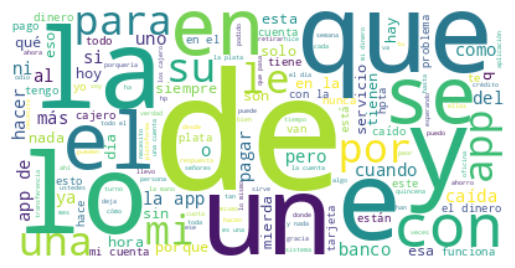

In [245]:
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😡'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [246]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [247]:
en_stops = set(stopwords.words('spanish'))
en_stops

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [248]:
all_words = ['There', 'is', 'a', 'tree','near','the','river', 'cómo','tan', 'alguna', 'casi', 'vaya']
for word in all_words:
    if word not in en_stops:
        print(word)

custom_stop_words = ['alguna', 'near', 'cómo',  'casi', 'vaya', ',']  # Replace with your custom stop words
en_stops.update(custom_stop_words)
for word in all_words:
    if word not in en_stops:
        print(word, 'added')

There
is
tree
near
the
river
cómo
tan
alguna
casi
vaya
There added
is added
tree added
the added
river added
tan added


In [249]:
df

,tweet,emoticons,y,feeling
0,,😁,Smile,Positive
1,dejen de responder mierda que no funciona co...,😤,Angry,Negative
2,"hágale doc, ya le paso el de cuenta de",🤗,Smile,Positive
3,por primera vez leí eso del día a día de y de...,😔,Sad,Negative
4,"te odio, pero te necesito",😤,Angry,Negative
...,...,...,...,...
2951,me tiene la vida aburrida con su bloqueadera ...,😡,Angry,Negative
2952,si tienen la oportunidad de abrir cuenta en d...,🤬,Angry,Negative
2953,esto no es cierto! sigue caída,😡,Angry,Negative
2954,"hola, olvide la clave de .",👍,Nice,Positive


In [250]:
tweet  =  df.loc[0,'tweet']

In [251]:
custom_stop_words = ['casi', 'pronto', 'tan',  'seguro', 'cúando']  # add to improve!
en_stops.update(custom_stop_words)

def remove_stopwords(tweet):
    new = []
    for word in tweet.split():
        if word not in en_stops:
            new.append(word)
    return " ".join(new)

In [252]:
remove_stopwords('cada día expreso mi inconformidad con la entidad')

'cada día expreso inconformidad entidad'

In [253]:
df['tweet'] =  df['tweet'].apply(lambda x : remove_stopwords(x))

In [254]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)

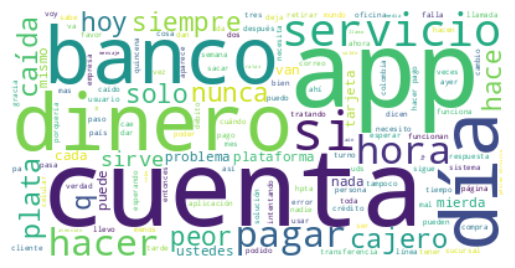

In [255]:
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😡'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [256]:
def remove_laughs(tweet):
    new = []
    for word in tweet.split():
        if bool(re.fullmatch('a*ja+j[ja]*', word))==False:
            new.append(word)
    return ' '.join(new)

In [257]:
df['tweet'] = df['tweet'].apply(lambda x : remove_laughs(x))

In [258]:
def remove_term(regex, tweet):
    new = []
    for word in tweet.split():
        if bool(re.fullmatch(regex, word))==False:
            new.append(word)
    return ' '.join(new)

In [259]:
remove_term('app', 'app no funciona')

'no funciona'

In [260]:
df['tweet'] =  df['tweet'].apply(lambda x: remove_term('miB[b]anco',x))

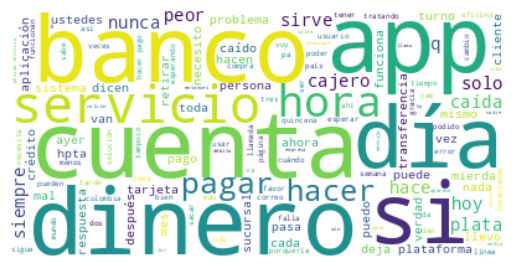

In [212]:
emojis = df['emoticons'].unique()
base_of_text={}
for emo in emojis:
    base_of_text[emo] = "".join(df[df['emoticons']==emo]['tweet'].values)
wc = WordCloud(background_color="white", repeat=True)
wc.generate(base_of_text['😡'])
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [214]:
df['feeling'] = np.where(df['feeling']=='Positive',1 ,0)
X  = df['tweet']
y = df['feeling']
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size = 0.25,  random_state=666)

<ipython-input-214-b77acbd39c7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['feeling'] = np.where(df['feeling']=='Positive',1 ,0)


In [184]:
df= df[df['tweet'].apply(lambda tweet: len(str(tweet))!=0)]
df.reset_index(inplace=True, drop=True)

In [215]:
from sklearn.feature_extraction.text import CountVectorizer

In [218]:
### Logistic Regression
def grid_search_lr(X_train, y_train):
    model = LogisticRegression(random_state=666, max_iter=1000)
    class_weight =  [{1:0.5, 0:0.5}]
    solvers = ['liblinear']
    penalty = ['l2','l1' ]
    c_values = [1000, 100,50, 10,1,0.1 ]
    grid = dict(solver=solvers,penalty=penalty,C=c_values, class_weight= class_weight)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scorer = make_scorer(f1_score, average = 'weighted')
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring=scorer,error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    best_params = grid_result.best_params_
    return best_params

In [220]:
# vectorization
vect = CountVectorizer().fit(X_train)
vect.get_feature_names_out()
X_train_vectorized = vect.transform(X_train)
params = grid_search_lr(X_train_vectorized, y_train)

# We are going to predict
model = LogisticRegression(penalty = params['penalty'],
                           class_weight=params['class_weight'],
                           solver = params['solver'],
                           C = params['C'],
                           random_state =123)
print(params)

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py", line 1173, in _fit_liblinear
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0


In [219]:
model.fit(X_train_vectorized, y_train)
preds = model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))
import numpy as np
f_names = np.array(vect.get_feature_names_out())
sorted_coef  = model.coef_[0].argsort()
print(f_names[sorted_coef][0:5])

ValueError: Found input variables with inconsistent numbers of samples: [600, 2141]

In [189]:
from imblearn.under_sampling import RandomUnderSampler

In [190]:
X_train = pd.DataFrame(X_train)
rus = RandomUnderSampler(random_state=1234)
X_train, y_train = rus.fit_resample(X_train, y_train)
X_train = X_train['tweet']

In [191]:
vect = CountVectorizer().fit(X_train)
#vect.get_feature_names_out()
X_train_vectorized = vect.transform(X_train)
model.fit(X_train_vectorized, y_train)
preds = model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))
import numpy as np
f_names = np.array(vect.get_feature_names_out())
sorted_coef  = model.coef_[0].argsort()
print(f_names[sorted_coef][0:5])

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       622
           1       0.28      0.66      0.39       117

    accuracy                           0.68       739
   macro avg       0.60      0.67      0.59       739
weighted avg       0.81      0.68      0.72       739

['caído' 'hpta' 'cuándo' 'sirve' 'intentando']


In [192]:
def grid_RandomForest(X_train, y_train):
  model = RandomForestClassifier(random_state=0)
  n_estimators = np.arange(10,100,1)
  criterion = ['gini', 'entropy', 'log_loss']
  min_samples_split = [0.05, 0.1,]
  max_depth = [2,3,4,10]
  grid = dict(n_estimators = n_estimators, criterion = criterion,
              min_samples_split = min_samples_split, max_depth = max_depth)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                            scoring='f1',error_score='raise')
  grid_result = grid_search.fit(X_train, y_train)
  return  grid_result.best_estimator_

In [193]:
best_model = grid_RandomForest(X_train_vectorized, y_train)
preds = best_model.predict(vect.transform(X_test))
print(classification_report(y_test, preds))

KeyboardInterrupt: 